In [10]:
#Importing Libraries
#numpy and pandas for manipulatin data
#matplotlib and seaborn for visualisation
#pathlib for getting home path of user on any machine
#scikit learn for deploying ML models on data and getting accuracy metrics


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
#Reading the data from a csv file and storing in a dataframe structure.
#Got this dataset from kaggle website.
from pathlib import *
stock_df = pd.read_csv(str(Path.home())+'/Downloads/ShubhamParabProject/prices.csv')

In [18]:
#To check first few rows of the dataframe to get an idea how the data is structured
#head(n) will give first n rows. By defauklt it return first 5 entries.
#tail(n) gives last n rows.

stock_df.head()
#stock_df.tail()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [19]:
#Information about columns present

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [20]:
#Statistical Info about the data.
#Mean,standard deviation and 3 quartiles give an idea about distribution of data over the range of values present.

stock_df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [21]:
#Converting date column to datetime dtype.

stock_df.date = pd.to_datetime(stock_df['date'])

In [24]:
#Number of unique stock price entries of each company.
stock_df.symbol.value_counts()

AIG      1762
CMG      1762
RRC      1762
HOG      1762
CRM      1762
UAA      1762
GWW      1762
CL       1762
HON      1762
NKE      1762
AMAT     1762
GE       1762
EXPD     1762
PCLN     1762
MHK      1762
SLB      1762
LH       1762
MMC      1762
BXP      1762
HAS      1762
XRX      1762
COF      1762
DISCK    1762
LUV      1762
SEE      1762
PRGO     1762
DISCA    1762
UNP      1762
ICE      1762
MSI      1762
         ... 
TRIP     1008
FBHS     1008
TDG      1008
KORS     1008
PSX      1008
MPC      1008
HCA      1008
XYL      1008
ABBV     1008
FB       1008
NLSN     1008
DLPH     1008
ZTS       987
COTY      896
MNK       894
NWS       892
NWSA      892
EVHC      853
ALLE      786
CFG       504
QRVO      504
SYF       504
NAVI      504
WRK       385
KHC       378
PYPL      378
HPE       304
CSRA      284
WLTW      251
FTV       126
Name: symbol, Length: 501, dtype: int64

In [25]:
#Selecting only 1 company stock data(Google) for purpose of project.

stock_google_df = stock_df[stock_df['symbol'] == 'GOOGL'].reset_index().drop('index',axis=1)
stock_google_df.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
1,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
3,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
4,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


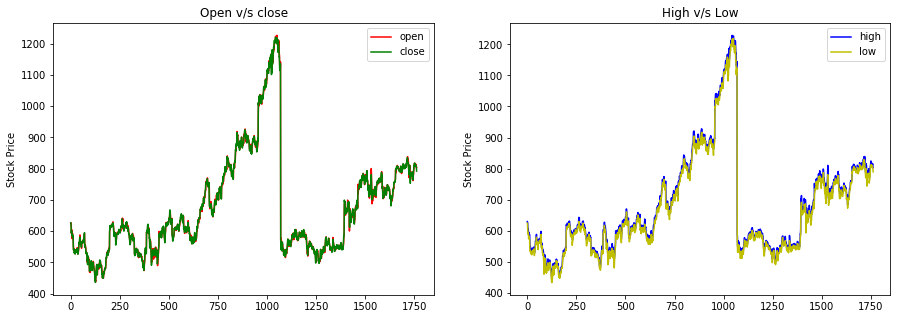

In [27]:
#Plotting relationship betweeen high/low and open/close 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(stock_google_df.index,stock_google_df.open,'r-')
plt.plot(stock_google_df.index,stock_google_df.close,'g-')
plt.title('Open v/s close')
plt.ylabel('Stock Price')
plt.legend()
plt.subplot(1,2,2)
plt.plot(stock_google_df.index,stock_google_df.high,'b-')
plt.plot(stock_google_df.index,stock_google_df.low,'y-')
plt.title('High v/s Low')
plt.ylabel('Stock Price')
plt.legend()

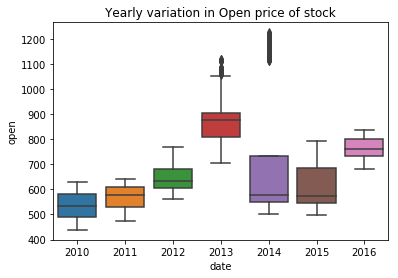

In [28]:
plt.title('Yearly variation in Open price of stock')
sns.boxplot(x=stock_google_df.date.dt.year,y='open',data=stock_google_df)

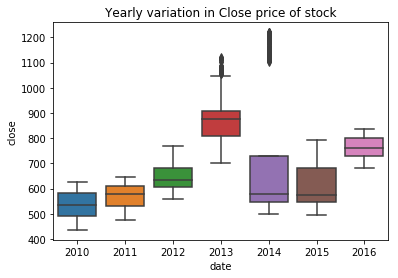

In [29]:
plt.title('Yearly variation in Close price of stock')
sns.boxplot(x=stock_google_df.date.dt.year,y='close',data=stock_google_df)

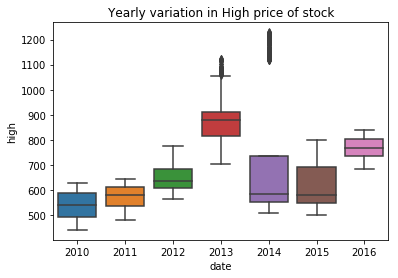

In [30]:
plt.title('Yearly variation in High price of stock')
sns.boxplot(x=stock_google_df.date.dt.year,y='high',data=stock_google_df)

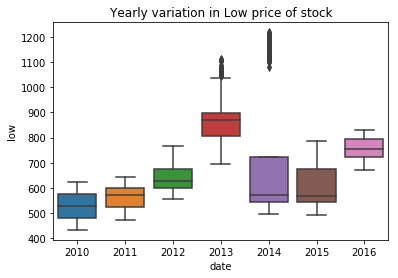

In [31]:
plt.title('Yearly variation in Low price of stock')
sns.boxplot(x=stock_google_df.date.dt.year,y='low',data=stock_google_df)

In [32]:
#Dropping symbol column as we are analysing only for 1 company google.
#If there were multiple companies we would have given them numeric labels before feeding into ML model.
stock_google_df.drop('symbol',axis=1,inplace=True)

In [33]:
stock_google_df.head()

,date,open,close,low,high,volume
0,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0
1,2010-01-05,627.180001,623.990017,621.540016,627.839984,6003300.0
2,2010-01-06,625.860033,608.260035,606.360021,625.860033,7949400.0
3,2010-01-07,609.400008,594.100015,592.649990,609.999993,12815700.0
4,2010-01-08,592.000005,602.020005,589.110015,603.250036,9439100.0


In [34]:
#Separating features and target labels.
#Lets predict the close price based on open,high and low.

X = stock_google_df.drop(['close','date'],axis=1).iloc[:,:].values
y = stock_google_df['close'].values

In [35]:
#Scaling features to avoid overfitting on one feature due to bias in values of range.

sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
#Splitting 80-20 into train and test respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Since target variable is continuous using regression analysis.
#Linear Regression is the simplest yet an efficient method.
# y = m1*x1 + m2*x2 + ..... + c

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [38]:
#RMSE - Evaluation metric in case of  regression.

mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 3.4349145832318757


Text(0,0.5,'Close Price of stock')

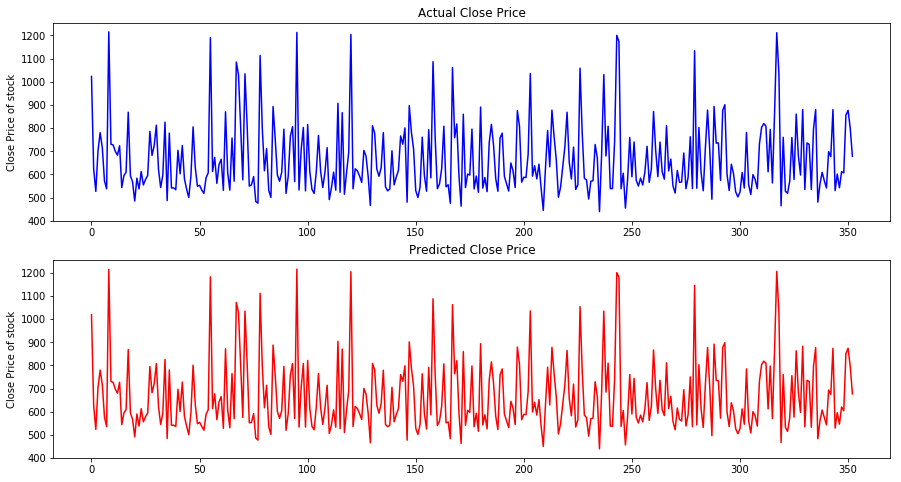

In [40]:
#Plotting predicted vs actual values for Close price

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title('Actual Close Price')
plt.ylabel('Close Price of stock')
plt.plot(y_test,color='blue')
plt.subplot(2,1,2)
plt.plot(y_pred,color ='red')
plt.title('Predicted Close Price')
plt.ylabel('Close Price of stock')

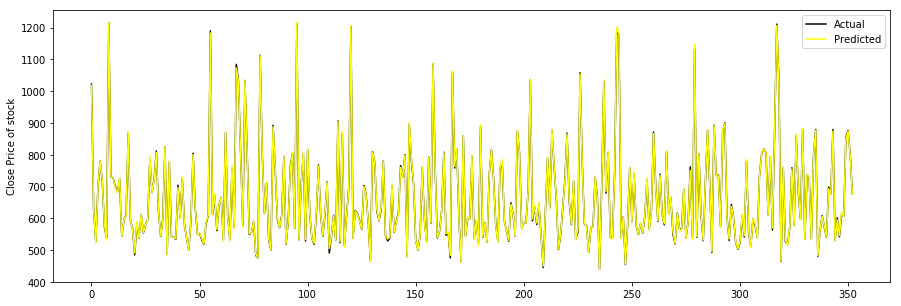

In [45]:
# Predicted and actual values on top of one another
plt.figure(figsize=(15,5))
plt.plot(y_test,color='black')
plt.plot(y_pred,color ='yellow')
plt.ylabel('Close Price of stock')
plt.legend(['Actual','Predicted'])